In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib

In [2]:
data = np.array([list(map(int, l.strip().split(' '))) for l in open('./data1.txt').readlines()])
features = data[:, :2]
labels = data[:, 2]

In [3]:
def kernel_perceptron(features, labels):
  # (x1, x2, x1x2, x1^2, x2^2)
  w = np.zeros(5)
  b = 0
  while True:
    is_any_misclassified = False
    for i in range(len(features)):
      x = features[i]
      y = labels[i]
      transformed_x = np.array([x[0], x[1], x[0]*x[1], x[0]*x[0], x[1]*x[1]])
      # Wrong prediction
      if y*(w @ transformed_x + b) <= 0:
        is_any_misclassified = True
        w = w + y * transformed_x
        b = b + y
    if not is_any_misclassified:
      print('Done', i)
      break
  return w, b

In [4]:
w, b = kernel_perceptron(features, labels)

Done 75


In [5]:
def plot_decision_boundary(features, labels, w, b):
  cols = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

  ax = plt.gca()
  step = 0.1
  for i in np.arange(0, 11, step):
    for j in np.arange(0, 11, step):
      x = [i,j]
      transformed_x = np.array([x[0], x[1], x[0]*x[1], x[0]*x[0], x[1]*x[1]])
      pred = int((w @ transformed_x + b) > 0)
      rect = Rectangle((i,j), step, step, color=cols[pred])
      ax.add_patch(rect)

  ax.scatter(features[:,0], features[:,1], c=labels, zorder=5)
  plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


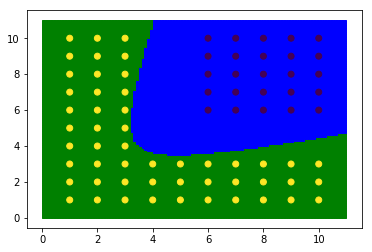

In [27]:
plot_decision_boundary(features, labels, w, b)

In [42]:
data2 = np.array([list(map(int, l.strip().split(' '))) for l in open('./data2.txt').readlines()])
features2 = data2[:, :2]
labels2 = data2[:, 2]
w2, b2 = kernel_perceptron(features2, labels2)

Done 59


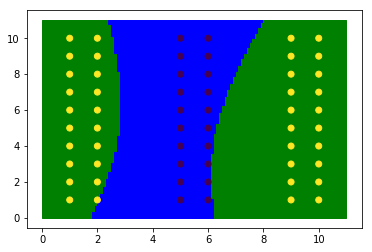

In [38]:
plot_decision_boundary(features2, labels2, w2, b2)

## With Kernel Trick

In [68]:
def output_dual(features, labels, kernel_func, alphas, b, sample):
  return sum([a*y*(kernel_func(x, sample)) for a, x, y in zip(alphas, features, labels)]) + b
  
def kernel_perceptron_dual(features, labels, kernel_func):
  # (x1, x2, x1x2, x1^2, x2^2)
  alphas = np.zeros(len(features))
  b = 0
  iters = 0
  while True:
    iters += 1
    is_any_misclassified = False
    for i in range(len(features)):
      x = features[i]
      y = labels[i]
      out = output_dual(features, labels, kernel_func, alphas, b, x)
      # Wrong prediction
      if y * out <= 0:
        is_any_misclassified = True
        alphas[i] += 1
        b = b + y
    if not is_any_misclassified:
      print('Done', iters)
      break
  return alphas, b

def quadratic_kernel(x, z):
  return (1 + x @ z)**2
  

In [93]:
alphas, b = kernel_perceptron_dual(features, labels,  quadratic_kernel)
alphas2, b2 = kernel_perceptron_dual(features2, labels2,  quadratic_kernel)

Done 9
Done 3586


In [94]:
def plot_decision_boundary_dual(features, labels, kernel_func, alphas, b):
  cols = ['blue', 'green', 'red', 'c', 'm', 'y', 'k', 'w']

  ax = plt.gca()
  step = 0.2
  for i in np.arange(0, 11, step):
    for j in np.arange(0, 11, step):
      x = [i,j]
      out = output_dual(features, labels, kernel_func, alphas, b, x)
      pred = int(np.sign(out)) + 1
      rect = Rectangle((i,j), step, step, color=cols[pred])
      ax.add_patch(rect)

#   default_s = matplotlib.rcParams['lines.markersize'] ** 2
#   s = default_s + alphas ** 2
  ax.scatter(features[:,0], features[:,1], c=labels, zorder=5)
  plt.show()

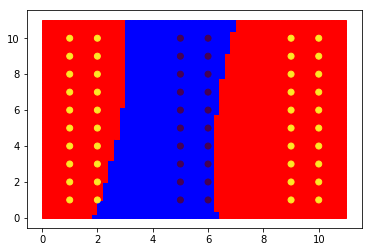

In [95]:
# plot_decision_boundary_dual(features, labels, quadratic_kernel, alphas, b)
plot_decision_boundary_dual(features2, labels2, quadratic_kernel, alphas2, b2)

## RBF Kernel

In [85]:
def rbf_kernel(scale=1):
  def _rbf_kernel(x, y):
    norm = np.inner(x-y, x-y)
    return np.exp(-norm/scale**2)
  return _rbf_kernel

Done 5
Done 3


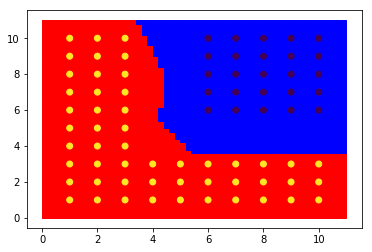

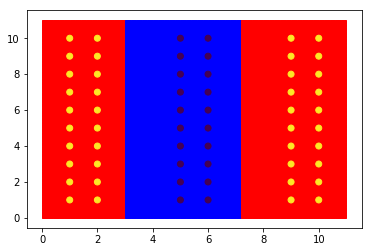

In [96]:
def exp(s):
  alphas, b = kernel_perceptron_dual(features, labels,  rbf_kernel(s))
  alphas2, b2 = kernel_perceptron_dual(features2, labels2,  rbf_kernel(s))
  plot_decision_boundary_dual(features, labels, rbf_kernel(s), alphas, b)
  plot_decision_boundary_dual(features2, labels2, rbf_kernel(s), alphas2, b2)
  
exp(1)

Done 8
Done 3


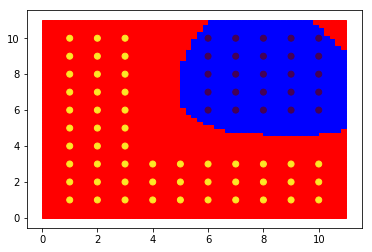

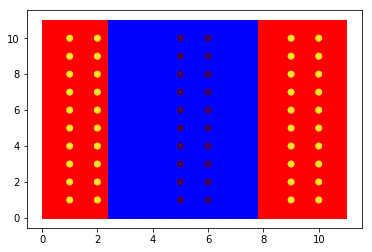

In [97]:
exp(3)

Done 9
Done 8


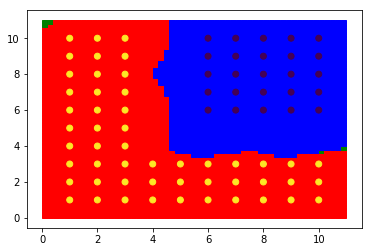

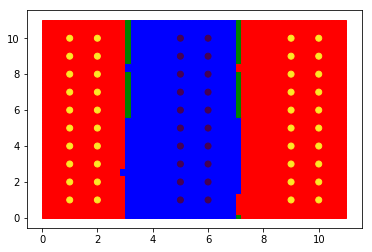

In [98]:
exp(0.1)

Done 9
Done 34


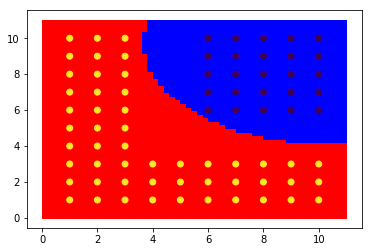

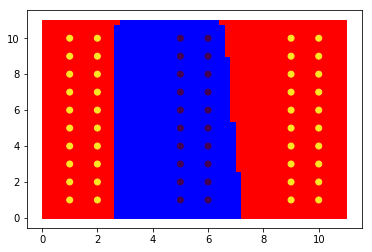

In [99]:
exp(10)

## Kernel SVM

In [100]:
import sklearn.svm.LinearSV